# Southern Ocean EKE  in OCCIPUT

This notebook is our second attempt to make sense of EKE in the Southern Ocean from the OCCIPUT ensemble. In this attemp:
 * EKE has been calculated from daily SSH, using geostrophic velocity (provided by Sally Close).
 * Each component of geostrophic velocity was averaged onto the T grid, squared and resampled monthly.

### Executive Summary

TBD


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import numpy as np
import IPython.display
import pandas as pd
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import os 

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

In [2]:
HardDisk = '/g/data/v45/amh157/OCCIPUT/'
EnsembleDir = 'geouv/'

## Ensemble Averages
First load the EKE from each member, calculate annual climatology, make ensemble average climatology (`eke_month`) and save a netCDF file for future use. 

In [12]:
## To compute EKE climatology and save in a netCDF file.
nfiles = 50
nn=0
for ii in range(1,nfiles+1):
    nn+=1
    i00 = '%03d' % ii
    Member = 'e'+i00
    ekefilename = HardDisk+EnsembleDir+Member+'/eke_'+i00+'_????.nc'
        
    eke = xr.open_mfdataset(ekefilename).EKE
    print(ekefilename)
    if nn==1:
        eke_month = eke.groupby('time.month').mean('time')
    else:
        eke_month = eke_month + eke.groupby('time.month').mean('time')

eke_month = eke_month/nn
climfilename = HardDisk+EnsembleDir+'eke_climatology.nc'
eke_month.to_netcdf(climfilename)

/Volumes/Lacie/geouv/e001/eke_001_????.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc
/Volumes/Lacie/geouv/e013/eke_013_????.nc
/Volumes/Lacie/geouv/e014/eke_014_????.nc
/Volumes/Lacie/geouv/e015/eke_015_????.nc
/Volumes/Lacie/geouv/e016/eke_016_????.nc
/Volumes/Lacie/geouv/e017/eke_017_????.nc
/Volumes/Lacie/geouv/e018/eke_018_????.nc
/Volumes/Lacie/geouv/e019/eke_019_????.nc
/Volumes/Lacie/geouv/e020/eke_020_????.nc
/Volumes/Lacie/geouv/e021/eke_021_????.nc
/Volumes/Lacie/geouv/e022/eke_022_????.nc
/Volumes/Lacie/geouv/e023/eke_023_????.nc
/Volumes/Lacie/geouv/e024/eke_024_

In [13]:
eke_month

<xarray.DataArray 'EKE' (month: 12, lat: 1020, lon: 1441)>
dask.array<shape=(12, 1020, 1441), dtype=float64, chunksize=(1, 1020, 1441)>
Coordinates:
  * lat      (lat) float32 -77.0105 -76.9542 -76.8976 -76.8408 -76.7838 ...
  * lon      (lon) float32 -287.0 -286.75 -286.5 -286.25 -286.0 -285.75 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

## Pacific
Compute area-averaged EKE for each member of the Pacific box from Hogg et al. (2015) [150-288°E, 62-48°S], and save as a netcdf file.

In [7]:
%%time
nfiles = 50
nn=0
for ii in range(1,nfiles+1):
    nn+=1
    i00 = '%03d' % ii
    Member = 'e'+i00
    ekefilename = HardDisk+EnsembleDir+Member+'/eke_'+i00+'_????.nc'
    outfilename = HardDisk+EnsembleDir+Member+'/eke_p_'+i00+'.nc'
        
    eke = xr.open_mfdataset(ekefilename).EKE
    print(ekefilename+' -> '+outfilename)
    
    eke_p = eke.sel(lon=slice(-210,-72)).sel(lat=slice(-62,-48)).mean('lon').mean('lat')
    eke_p.to_netcdf(outfilename)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_p_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_p_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_p_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_p_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_p_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_p_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_p_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_p_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_p_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_p_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_p_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv/e012/eke_p

## Indian
Compute area-averaged EKE for each member of the Indian box from Hogg et al. (2015) [40-150°E, 57-44°S; noting that this box spans the longitude split in ORCA025 output] and save as a netcdf file.

In [9]:
%%time
nfiles = 50
nn=0
for ii in range(1,nfiles+1):
    nn+=1
    i00 = '%03d' % ii
    Member = 'e'+i00
    ekefilename = HardDisk+EnsembleDir+Member+'/eke_'+i00+'_????.nc'
    outfilename = HardDisk+EnsembleDir+Member+'/eke_i_'+i00+'.nc'
        
    eke = xr.open_mfdataset(ekefilename).EKE
    print(ekefilename+' -> '+outfilename)
    
    eke_i = (77*eke.sel(lon=slice(-287,-210)).sel(lat=slice(-57,-44)).mean('lon').mean('lat') 
            +  33*eke.sel(lon=slice(40,73)).sel(lat=slice(-57,-44)).mean('lon').mean('lat'))/110
    eke_i.to_netcdf(outfilename)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_i_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_i_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_i_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_i_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_i_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_i_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_i_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_i_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_i_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_i_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_i_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv/e012/eke_i

## Atlantic
Compute area-averaged EKE for each member of the Atlantic box from Hogg et al. (2015) [325-10°E,56-46°S] and save as a netcdf file.

In [10]:
%%time
nfiles = 50
nn=0
for ii in range(1,nfiles+1):
    nn+=1
    i00 = '%03d' % ii
    Member = 'e'+i00
    ekefilename = HardDisk+EnsembleDir+Member+'/eke_'+i00+'_????.nc'
    outfilename = HardDisk+EnsembleDir+Member+'/eke_a_'+i00+'.nc'
        
    eke = xr.open_mfdataset(ekefilename).EKE
    print(ekefilename+' -> '+outfilename)
    
    eke_a = eke.sel(lon=slice(-35,-10)).sel(lat=slice(-56,-46)).mean('lon').mean('lat')
    eke_a.to_netcdf(outfilename)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_a_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_a_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_a_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_a_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_a_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_a_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_a_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_a_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_a_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_a_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_a_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv/e012/eke_a

## Entire Southern Ocean
Compute area-averaged EKE for each member of the Entire Southern Ocean box [here defined as 65-40°S] and save as a netcdf file.

In [11]:
%%time
nfiles = 50
nn=0
for ii in range(1,nfiles+1):
    nn+=1
    i00 = '%03d' % ii
    Member = 'e'+i00
    ekefilename = HardDisk+EnsembleDir+Member+'/eke_'+i00+'_????.nc'
    outfilename = HardDisk+EnsembleDir+Member+'/eke_s_'+i00+'.nc'
        
    eke = xr.open_mfdataset(ekefilename).EKE
    print(ekefilename+' -> '+outfilename)
    
    eke_s = eke.sel(lat=slice(-65,-40)).mean('lon').mean('lat')
    eke_s.to_netcdf(outfilename)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_s_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_s_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_s_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_s_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_s_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_s_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_s_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_s_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_s_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_s_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_s_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv/e012/eke_s

In [29]:
# now post-process wind stress
taufilename = HardDisk+EnsembleDir+'tau/'+'tau_????.nc'
tau = xr.open_mfdataset(taufilename).tau

outfilename = HardDisk+EnsembleDir+'tau/'+'tau_p.nc'
print(taufilename+' -> '+outfilename)
tau_p = tau.sel(lon=slice(-210,-72)).sel(lat=slice(-62,-48)).mean('lon').mean('lat')
tau_p.to_netcdf(outfilename)

outfilename = HardDisk+EnsembleDir+'tau/'+'tau_i.nc'
print(taufilename+' -> '+outfilename)
tau_i = (77*tau.sel(lon=slice(-287,-210)).sel(lat=slice(-57,-44)).mean('lon').mean('lat') 
            +  33*tau.sel(lon=slice(40,73)).sel(lat=slice(-57,-44)).mean('lon').mean('lat'))/110
tau_i.to_netcdf(outfilename)

outfilename = HardDisk+EnsembleDir+'tau/'+'tau_a.nc'
print(taufilename+' -> '+outfilename)
tau_a = tau.sel(lon=slice(-35,-10)).sel(lat=slice(-56,-46)).mean('lon').mean('lat')
tau_a.to_netcdf(outfilename)


outfilename = HardDisk+EnsembleDir+'tau/'+'tau_s.nc'
print(taufilename+' -> '+outfilename)
tau_s = tau.sel(lat=slice(-65,-40)).mean('lon').mean('lat')
tau_s.to_netcdf(outfilename)

/Volumes/Lacie/geouv/tau/tau_????.nc -> /Volumes/Lacie/geouv/tau/tau_p.nc
/Volumes/Lacie/geouv/tau/tau_????.nc -> /Volumes/Lacie/geouv/tau/tau_i.nc
/Volumes/Lacie/geouv/tau/tau_????.nc -> /Volumes/Lacie/geouv/tau/tau_a.nc
/Volumes/Lacie/geouv/tau/tau_????.nc -> /Volumes/Lacie/geouv/tau/tau_s.nc


In [4]:
# function to process eke and tau, and save as files
def process_eke_box( desc, lon1,  lon2, lat1,  lat2):
    nfiles = 50
    nn=0
    for ii in range(1,nfiles+1):
        nn+=1
        i00 = '%03d' % ii
        Member = 'e'+i00
        ekefilename = HardDisk+EnsembleDir+Member+'/eke_'+i00+'_????.nc'
        outfilename = HardDisk+EnsembleDir+Member+'/eke_'+desc+'_'+i00+'.nc'
        
        eke = xr.open_mfdataset(ekefilename).EKE
        print(ekefilename+' -> '+outfilename)
    
        eke = eke.sel(lon=slice(lon1,lon2)).sel(lat=slice(lat1,lat2)).mean('lon').mean('lat')
        eke.to_netcdf(outfilename)
    
    
    taufilename = HardDisk+EnsembleDir+'tau/'+'tau_????.nc'
    tau = xr.open_mfdataset(taufilename).tau
    
    outfilename = HardDisk+EnsembleDir+'tau/'+'tau_'+desc+'.nc'
    print(taufilename+' -> '+outfilename)
    tau = tau.sel(lon=slice(lon1,lon2)).sel(lat=slice(lat1,lat2)).mean('lon').mean('lat')
    tau.to_netcdf(outfilename)

## Campbell Plateau
Also similar to the entire South Pacific - this small region appears to dominate the Pacific EKE variability and trends.

In [33]:
process_eke_box('cp', -200, -180, -63, -50)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_cp_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_cp_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_cp_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_cp_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_cp_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_cp_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_cp_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_cp_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_cp_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_cp_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_cp_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

## Agulhas retroflection
Didn't quite include the full area here, but this region seems to be dominated by intrinsic variability.

In [4]:
process_eke_box('ag', 12,  35, -45,  -33)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_ag_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_ag_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_ag_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_ag_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_ag_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_ag_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_ag_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_ag_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_ag_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_ag_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_ag_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

## Malvinas/Zapiola Gyre

In [35]:
process_eke_box('mv', -60, -30, -50, -33,)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_mv_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_mv_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_mv_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_mv_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_mv_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_mv_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_mv_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_mv_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_mv_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_mv_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_mv_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

## Drake Passage

In [6]:
process_eke_box('dp', -80, -55, -65, -52)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_dp_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_dp_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_dp_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_dp_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_dp_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_dp_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_dp_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_dp_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_dp_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_dp_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_dp_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

## Kerguelen

In [7]:
process_eke_box('ke', -287, -270, -60, -50)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_ke_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_ke_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_ke_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_ke_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_ke_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_ke_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_ke_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_ke_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_ke_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_ke_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_ke_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

## Macquarie Ridge

In [8]:
process_eke_box('mr', -215, -200, -60, -47)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_mr_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_mr_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_mr_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_mr_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_mr_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_mr_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_mr_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_mr_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_mr_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_mr_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_mr_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

In [6]:
process_eke_box('nz', -180, -160, -60, -45)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_nz_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_nz_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_nz_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_nz_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_nz_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_nz_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_nz_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_nz_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_nz_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_nz_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_nz_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

In [8]:
process_eke_box('p1', -155, -140, -63, -50)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_p1_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_p1_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_p1_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_p1_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_p1_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_p1_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_p1_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_p1_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_p1_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_p1_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_p1_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

In [9]:
process_eke_box('p2', -140, -120, -60, -50)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_p2_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_p2_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_p2_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_p2_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_p2_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_p2_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_p2_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_p2_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_p2_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_p2_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_p2_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

In [10]:
process_eke_box('al', -20,  10, -55,  -40)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_al_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_al_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_al_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_al_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_al_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_al_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_al_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_al_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_al_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_al_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_al_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

In [11]:
process_eke_box('ar', 40,  61, -47,  -36)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_ar_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_ar_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_ar_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_ar_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_ar_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_ar_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_ar_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_ar_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_ar_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_ar_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_ar_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

## SouthEast Indian Ocean
A long-term trend and forced anomaly from the SAM in 2001.

In [5]:
process_eke_box('se', -265, -240, -50, -40)

/Volumes/Lacie/geouv/e001/eke_001_????.nc -> /Volumes/Lacie/geouv/e001/eke_se_001.nc
/Volumes/Lacie/geouv/e002/eke_002_????.nc -> /Volumes/Lacie/geouv/e002/eke_se_002.nc
/Volumes/Lacie/geouv/e003/eke_003_????.nc -> /Volumes/Lacie/geouv/e003/eke_se_003.nc
/Volumes/Lacie/geouv/e004/eke_004_????.nc -> /Volumes/Lacie/geouv/e004/eke_se_004.nc
/Volumes/Lacie/geouv/e005/eke_005_????.nc -> /Volumes/Lacie/geouv/e005/eke_se_005.nc
/Volumes/Lacie/geouv/e006/eke_006_????.nc -> /Volumes/Lacie/geouv/e006/eke_se_006.nc
/Volumes/Lacie/geouv/e007/eke_007_????.nc -> /Volumes/Lacie/geouv/e007/eke_se_007.nc
/Volumes/Lacie/geouv/e008/eke_008_????.nc -> /Volumes/Lacie/geouv/e008/eke_se_008.nc
/Volumes/Lacie/geouv/e009/eke_009_????.nc -> /Volumes/Lacie/geouv/e009/eke_se_009.nc
/Volumes/Lacie/geouv/e010/eke_010_????.nc -> /Volumes/Lacie/geouv/e010/eke_se_010.nc
/Volumes/Lacie/geouv/e011/eke_011_????.nc -> /Volumes/Lacie/geouv/e011/eke_se_011.nc
/Volumes/Lacie/geouv/e012/eke_012_????.nc -> /Volumes/Lacie/geouv

## Larger South Atlantic box
Dominated by intrinsic variability.

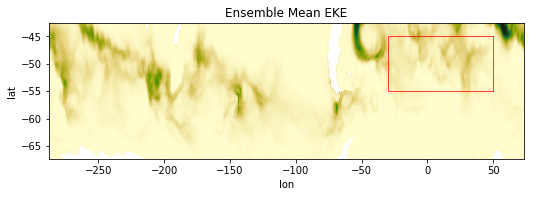

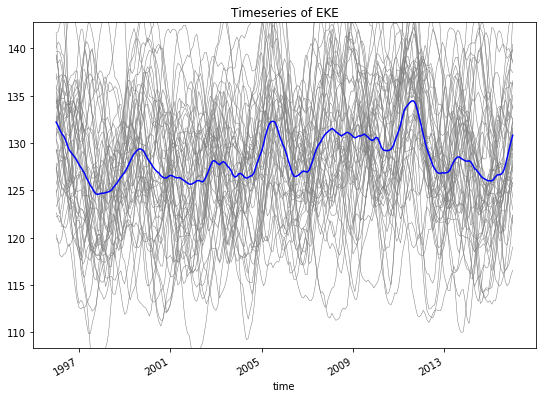

In [205]:
plot_eke_box(-30,  50, -55,  -45)

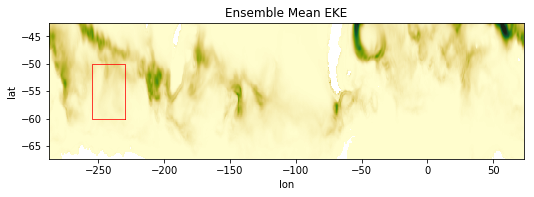

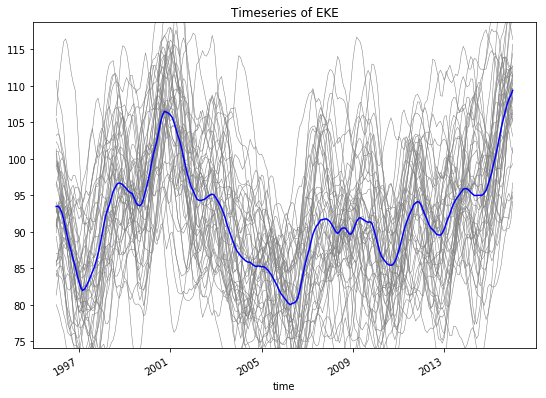

In [27]:
plot_eke_box(-255,  -230, -60,  -50)

## To Do Next:
* Look at signal to noise ratio?
* Map the max correlation between local forcing and EKE?
* Bin behaviour into "depth" bins, or topographic gradient bins?
* Use proper EKE data (Sally to provide).
* Get model wind stress for local correlation tests.